# Personalized Bet Analytics

Importing packages and modules...

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from dash import Dash, Input, Output, dcc, html

Using wrangle function to clean data and create a data frame...

In [3]:
def wrangle_func(filepath):
    # Create dictionary to hold the needed information
    info_dict = {
        "Date & Time": [],
        "Status": [],
        "Total Stake": [],
        "Total Return": []
    }
    
    # Use file handling to open and read txt file
    with open(filepath) as f:
        first_line = f.readlines()
    
    # Use filter and map funtion to further clean data
    first_line_no_break = list(filter(lambda x: False if x == "\n" else True, first_line))
    first_line_no_break = list(map(lambda x: x.replace("\n", "") if "\n" in x else x, first_line_no_break))

    # Create for loop to append cleaned data into info_dict
    for line in first_line_no_break:
        if "/" in line:
            info_dict["Date & Time"].append(line)
        if "Multiple" in line:
            info_dict["Status"].append(line.replace("Multiple", ""))
        if "Singles" in line:
            info_dict["Status"].append(line.replace("Singles", ""))
        if "Total Stake" in line:
            info_dict["Total Stake"].append(line.replace("Total Stake:", ""))
        if "Total Return" in line:
            info_dict["Total Return"].append(line.replace("Total Return:", ""))

    # Use pandas to create dataframe as df
    df = pd.DataFrame(info_dict)
    
    # Split date & time column for flexibility of data
    # df[["Date", "Time"]] = df["Date & Time"].str.split(" ", expand=True)
    
    df["Total Stake"] = df["Total Stake"].str.replace(",", "").astype(float)
    
    df["Total Return"] = df["Total Return"].str.replace(",", "").replace("--", "0.00").astype(float)
    
    # Drop unwanted columns from dataframe
    # df.drop(columns=["Date & Time"], inplace=True)
    
    return df

In [4]:
df = wrangle_func("pat_stats_oct.txt")
df.head()

,Date & Time,Status,Total Stake,Total Return
0,30/10/2023 15:53,Running,500.00,0.00
1,30/10/2023 15:51,Running,245.57,0.00
2,29/10/2023 16:39,Won,1000.00,4745.57
3,29/10/2023 16:37,Lost,1000.00,0.00
4,28/10/2023 18:31,Lost,200.00,0.00


In [5]:
df.set_index("Date & Time", inplace=True)
df.index

Index(['30/10/2023 15:53', '30/10/2023 15:51', '29/10/2023 16:39',
       '29/10/2023 16:37', '28/10/2023 18:31', '28/10/2023 17:01',
       '28/10/2023 16:03', '28/10/2023 13:09', '28/10/2023 13:06',
       '28/10/2023 05:05', '21/10/2023 11:03', '21/10/2023 01:12',
       '16/10/2023 23:49', '08/10/2023 13:56', '07/10/2023 11:21',
       '07/10/2023 00:23', '06/10/2023 23:20', '06/10/2023 19:47',
       '06/10/2023 16:04', '06/10/2023 15:59', '06/10/2023 15:53',
       '06/10/2023 13:53', '06/10/2023 13:47', '06/10/2023 13:45',
       '06/10/2023 13:43', '04/10/2023 21:07', '04/10/2023 15:50',
       '04/10/2023 02:01', '03/10/2023 02:33', '01/10/2023 15:57',
       '01/10/2023 12:56', '01/10/2023 12:53'],
      dtype='object', name='Date & Time')

In [6]:
df.index = pd.DatetimeIndex(df.index)

In [7]:
print(df.shape)
df.info()
df.head()

(32, 3)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2023-10-30 15:53:00 to 2023-01-10 12:53:00
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Status        32 non-null     object 
 1   Total Stake   32 non-null     float64
 2   Total Return  32 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.0+ KB


,Status,Total Stake,Total Return
Date & Time,,,
2023-10-30 15:53:00,Running,500.00,0.00
2023-10-30 15:51:00,Running,245.57,0.00
2023-10-29 16:39:00,Won,1000.00,4745.57
2023-10-29 16:37:00,Lost,1000.00,0.00
2023-10-28 18:31:00,Lost,200.00,0.00


### Get the counts of the `Status` column and representing the values in a pie chart.

In [8]:
bet_status_chart = df["Status"].value_counts().to_frame()
bet_status_chart

,count
Status,
Lost,27
Won,3
Running,2


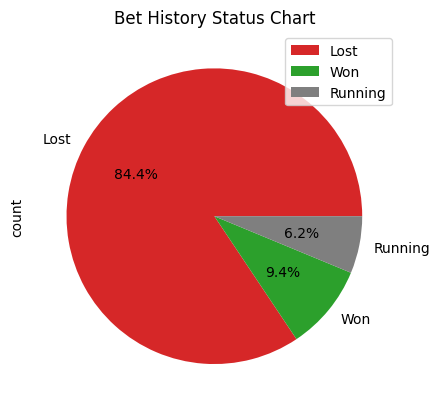

In [10]:
bet_status_chart.plot.pie(
    y="count",
    title="Bet History Status Chart",
    colors=["tab:red", "tab:green", "tab:grey"],
    autopct='%1.1f%%'
);

### Prepare a bar chart showing the `Status` counts across the given dates.

In order to get the different status value counts across the dates in which bets were placed, we have to group the `Status` column by the `Date` column using the `groupby` method. With the data frame `count_group` we can plot our bar chart.

In [12]:
count_group = df["Status"].groupby(df["Date"]).value_counts().rename("Count").reset_index()
count_group

,Date,Status,Count
0,01/10/2023,Lost,3
1,03/10/2023,Lost,1
2,04/10/2023,Lost,3
3,06/10/2023,Lost,7
4,06/10/2023,Won,2
5,07/10/2023,Lost,2
6,08/10/2023,Lost,1
7,16/10/2023,Lost,1
8,21/10/2023,Lost,2
9,28/10/2023,Lost,6


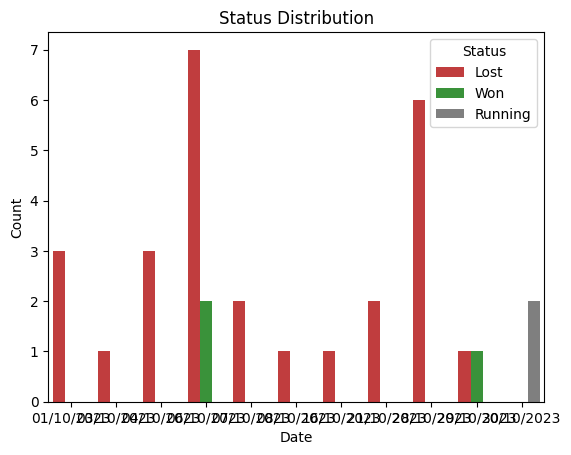

In [13]:
# Create bar chart using seaborn
sns.barplot(
    x="Date",
    y="Count",
    hue="Status",
    palette= {
        "Lost": "tab:red",
        "Won": "tab:green",
        "Running": "tab:grey"
        },
    data=count_group
)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Status Distribution");

### Calculate total staked and total returns

In [14]:
# Calcute total wins
mask_wins = df["Status"] == "Won"
df_wins = df[mask_wins]
Total_wins = df_wins["Total Return"].sum().round(2)

In [15]:
# Calculate total lost
mask_lost = df["Status"] == "Lost"
df_lost = df[mask_lost]
Total_lost = df_lost["Total Stake"].sum().round(2)

In [16]:
# Calculate total stakes
Total_staked = df["Total Stake"].sum()
# Presenting results
print(f"Total Staked: {Total_staked}")
print("")
print(f"Total Won: {Total_wins}")
print("")
print(f"Total Lost: {Total_lost}")

Total Staked: 12326.75

Total Won: 8076.75

Total Lost: 9781.18


## Create web dashboard app using Dash

In [26]:
app = Dash(__name__)
Server = app.server

In [65]:
fig1 = go.Figure(data=[
    go.Pie(labels=bet_status_chart.index,
           values=bet_status_chart["count"],
           hole=.3,
           title="Chart of Bet Status History"
          )
])

fig2 = px.bar(
    count_group, 
    x="Date", 
    y="Count", 
    color="Status", 
    title="Bet Status History"
)

In [66]:
app.layout = html.Div(
    [
        html.H1("Welcome to your Dashboard!"),
        dcc.Graph(figure=fig1, id="pie-chart"),
        html.Div(
            [
            html.H2(f"Total Staked: N{Total_staked}"),  
            html.H2(f"Total Won: N{Total_wins}"),
            html.H2(f"Total Lost: N{Total_lost}")
        ]   
        ),
        dcc.Graph(figure=fig2, id="bar-chart")
        
    ]
)

In [ ]:
app.run(jupyter_mode="external")